## **多時間序預測的LSTM by Machine Learning Mastery**

### **載入套件**

In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [37]:
def parser(date):
    return datetime.strptime('190'+date, '%Y-%m')
# header = 0 : 第一列數據做為標田 ; indox_col = 0 時間欄位作為 time_index
series = pd.read_csv('shampoo.csv' ,header= 0,index_col= 0)
# 將 time_index 處理成時間格式
series.index = pd.to_datetime('190'+series.index, format='%Y-%m')
print(series.head())

            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3


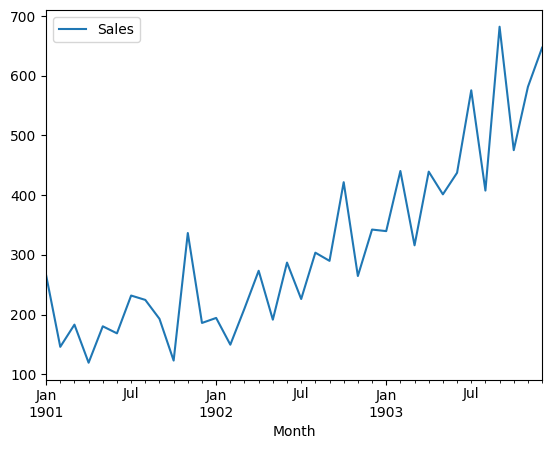

In [38]:
series.plot()
plt.show()

### **切割成訓練集、測試集(非隨機抽樣，而是以時間序的方式切割)**

#### **利用前12個月的數據預測後面3個月的數據** -> look_back = 12(month), predict_time_series = [0,1,2]

In [42]:
look_back = 12
predict_time_series = [0,1,2]
rows = np.array(series)
def create_dataset_v2(dataset, look_back=10, time_step=1):
    dataX, dataY = [], []
    for t in range(look_back, len(dataset) - len(time_step) + 1):
        dataX.append(dataset[t - look_back: t])
        dataY.append(dataset[t : t + len(time_step)])


array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])